**Service Request**
---

In [ ]:
import pandas as pd
import numpy as np
import ast

df = pd.read_csv("/content/MNIST_Client_Profiles_For_Composability_100.csv")
ATTR_COLUMNS = [
    'DataVolume(Samples)', 'FeatureCount', 'Local_Accuracy(%)', 'Train_Time(s)',
    'Latency(ms)', 'C_p', 'BW', 'Quality_Factor',
    'Mean_Quality_Factor(%)', 'Reliability_Score'
]
WEIGHT_RANGES = {
    'DataVolume(Samples)':      (0.80, 0.90),
    'FeatureCount':             (0.20, 0.40),
    'Local_Accuracy(%)':        (0.95, 0.99),
    'Train_Time(s)':            (0.40, 0.60),
    'Latency(ms)':              (0.90, 0.95),
    'C_p':                      (0.55, 0.75),
    'BW':                       (0.50, 0.70),
    'Quality_Factor':           (0.60, 0.80),
    'Mean_Quality_Factor(%)':   (0.70, 0.85),
    'Reliability_Score':        (0.70, 0.85)
}

rng = np.random.default_rng(seed=10)
NUM_REQUESTS = 10
service_requests = []

for rid in range(1, NUM_REQUESTS + 1):
    row = {'Request_ID': rid, 'Scenario': f"Request{rid}"}
    sample_row = df.sample(1, random_state=rid).iloc[0]

    for attr in ATTR_COLUMNS:
        val = sample_row[attr]

        # 🔥 FIX: convert list-like strings to numeric mean
        if isinstance(val, str) and val.startswith("[") and val.endswith("]"):
            parsed = ast.literal_eval(val)
            if isinstance(parsed, list):
                val = float(np.mean(parsed))
        row[attr] = float(val)

    for attr, (low, high) in WEIGHT_RANGES.items():
        row[f"w_{attr}"] = float(rng.uniform(low, high))

    service_requests.append(row)

Service_Request_df = pd.DataFrame(service_requests)
Service_Request_df.to_csv("Service_Request.csv", index=False)

print("Service Request DataFrame created successfully:")
Service_Request_df

Service Request DataFrame created successfully:


,Request_ID,Scenario,DataVolume(Samples),FeatureCount,Local_Accuracy(%),Train_Time(s),Latency(ms),C_p,BW,Quality_Factor,...,w_DataVolume(Samples),w_FeatureCount,w_Local_Accuracy(%),w_Train_Time(s),w_Latency(ms),w_C_p,w_BW,w_Quality_Factor,w_Mean_Quality_Factor(%),w_Reliability_Score
0,1,Request1,3553.0,784.0,90.79,2.863526,2863.525629,0.349220,6055.652174,87.320783,...,0.895600,0.241536,0.983138,0.429856,0.925640,0.577184,0.637807,0.768350,0.763826,0.843539
1,2,Request2,3217.0,784.0,87.66,2.814334,2814.334154,0.355324,5803.333333,86.602563,...,0.882533,0.267643,0.973030,0.550660,0.941355,0.736688,0.528999,0.749116,0.720903,0.835979
2,3,Request3,3501.0,784.0,87.86,3.160557,3160.556793,0.316400,6029.437229,87.677685,...,0.822611,0.370648,0.962253,0.593966,0.925892,0.614495,0.556487,0.721173,0.750065,0.801797
3,4,Request4,3120.0,784.0,91.77,3.118768,3118.767738,0.320639,3990.830946,87.712973,...,0.815443,0.249955,0.984796,0.520074,0.913099,0.579883,0.527358,0.649784,0.757424,0.797362
4,5,Request5,1334.0,784.0,51.07,3.256240,3256.240129,0.307103,6003.448276,90.164919,...,0.883756,0.355206,0.963581,0.429714,0.922851,0.637573,0.614844,0.674654,0.795074,0.717197
5,6,Request6,840.0,784.0,87.33,2.724485,2724.484921,0.367042,5952.136752,89.421811,...,0.823309,0.353448,0.989485,0.561600,0.942148,0.709137,0.591368,0.747734,0.786768,0.767610
6,7,Request7,3230.0,784.0,92.14,2.916060,2916.060448,0.342928,5295.817490,88.279393,...,0.827102,0.372921,0.952746,0.563347,0.944092,0.634703,0.666646,0.668203,0.777969,0.782381
7,8,Request8,840.0,784.0,87.33,2.724485,2724.484921,0.367042,5952.136752,89.421811,...,0.819288,0.266643,0.961101,0.491512,0.933742,0.686766,0.604723,0.692875,0.776294,0.748691
8,9,Request9,1222.0,784.0,81.91,2.473517,2473.517418,0.404283,5926.808511,86.006547,...,0.817260,0.259867,0.975943,0.412943,0.931685,0.605800,0.537192,0.697810,0.753053,0.714430
9,10,Request10,3030.0,784.0,92.13,3.167440,3167.440176,0.315712,5901.694915,88.752990,...,0.870956,0.358324,0.951772,0.525185,0.912493,0.635451,0.658103,0.706320,0.701956,0.702981


In [ ]:
import pandas as pd

# ======================================================
# LOAD EXISTING FILES
# ======================================================
existing_data1 = pd.read_csv('/content/CIFAR10_Client_Profiles_For_Composability_1000.csv')
existing_data2 = pd.read_csv('/content/FMNIST_Client_Profiles_For_Composability_100.csv')
existing_data3 = pd.read_csv('/content/HAR_Client_Profiles_For_Composability_100.csv')
existing_data4 = pd.read_csv('/content/MNIST_Client_Profiles_For_Composability_100.csv')
existing_data1["Dataset"]="CIFAR10"
existing_data2["Dataset"]="FMNIST"
existing_data3["Dataset"]="HAR"
existing_data4["Dataset"]="MNIST"

# ======================================================
# COMBINE ALL DATASETS INTO ONE
# ======================================================
combined_df = pd.concat([existing_data1, existing_data2, existing_data3, existing_data4],
                        ignore_index=True)

print("Initial combined rows:", combined_df.shape[0])
# ======================================================
# REPEAT ROWS UNTIL ROW COUNT REACHES 10,000
# ======================================================
TARGET_SIZE = 10000
repeats_needed = TARGET_SIZE // len(combined_df) + 1

expanded_df = pd.concat([combined_df] * repeats_needed, ignore_index=True)
final_df = expanded_df.iloc[:TARGET_SIZE].copy()  # exact 10,000 rows

print("Final rows:", final_df.shape[0])


Initial combined rows: 400
Final rows: 10000


In [ ]:
final_df.to_csv("MLaaS_Profiles_For_Composition_10000.csv")

In [ ]:
import pandas as pd

# ============================================================
# LOAD DATASETS
# ============================================================
df_mls = pd.read_csv('/content/MLaaS_Profiles_For_Composition_10000.csv')
service_requests = pd.read_csv("Service_Request.csv")

# ============================================================
# CLEANING & UNIQUE IDENTIFIER
# ============================================================
if 'Service_ID' not in df_mls.columns:
    df_mls['Service_ID'] = df_mls.index

print("\nAvailable Service Requests:")
print(service_requests[['Request_ID', 'Scenario']])

# ============================================================
# USER SELECTS A REQUEST
# ============================================================
req_id = int(input("\nEnter Request_ID to execute skyline for: "))
request_row = service_requests.loc[service_requests['Request_ID'] == req_id].iloc[0]

print(f"\nSelected Request Scenario: {request_row['Scenario']}")

# ============================================================
# STEP 1 – Extract all weight columns for this request
# ============================================================
weight_cols = [col for col in service_requests.columns if col.startswith("w_")]
weights = request_row[weight_cols].to_dict()

# ============================================================
# STEP 2 – Identify Top-4 attributes based on highest weights
# Drop prefix 'w_' to map weight -> attribute name
# ============================================================
sorted_weights = sorted(weights.items(), key=lambda x: x[1], reverse=True)
top4 = sorted_weights[:4]
selected_attributes = [col.replace("w_", "") for col, _ in top4]

print("\nTop 4 selected attributes based on weights:")
for col, w in top4:
    print(f"  {col.replace('w_', '')} (weight={round(w, 4)})")

# ============================================================
# DOMINANCE CHECK
# ============================================================
def is_dominated(p, q, attributes):
    """
    p is dominated by q if q is strictly better in ALL attributes.
    NOTE: Needs direction-awareness: higher is better OR lower is better
    """
    # Define maximize and minimize attributes
    maximize = {
        'DataVolume(Samples)', 'FeatureCount', 'Local_Accuracy(%)',
        'Quality_Factor', 'Mean_Quality_Factor(%)', 'Reliability_Score',
        'C_p', 'BW'
    }

    minimize = { 'Latency(ms)', 'Train_Time(s)' }

    for attr in attributes:
        # if q is NOT strictly better in this attribute → p is NOT dominated
        if attr in maximize and q[attr] <= p[attr]:
            return False
        if attr in minimize and q[attr] >= p[attr]:
            return False

    return True  # dominated in ALL attributes

# ============================================================
# SKYLINE COMPUTATION
# ============================================================
def skyline(df, attributes):
    sky = []
    for i, p in df.iterrows():
        dominated = False
        for j, q in df.iterrows():
            if i != j and is_dominated(p, q, attributes):
                dominated = True
                break
        if not dominated:
            sky.append(p['Service_ID'])
    return sky

print("\nRunning Skyline Query...")
skyline_services = skyline(df_mls, selected_attributes)

# ============================================================
# OUTPUT RESULTS
# ============================================================
print("\nSkyline services based on request preferences (top 10):")
print(skyline_services[:10])

print("Total Skyline Count:", len(skyline_services))


Available Service Requests:
   Request_ID   Scenario
0           1   Request1
1           2   Request2
2           3   Request3
3           4   Request4
4           5   Request5
5           6   Request6
6           7   Request7
7           8   Request8
8           9   Request9
9          10  Request10

Enter Request_ID to execute skyline for: 1

Selected Request Scenario: Request1

Top 4 selected attributes based on weights:
  Local_Accuracy(%) (weight=0.9831)
  Latency(ms) (weight=0.9256)
  DataVolume(Samples) (weight=0.8956)
  Reliability_Score (weight=0.8435)

Running Skyline Query...

Skyline services based on request preferences (top 10):
[14, 27, 37, 54, 55, 68, 71, 98, 100, 102]
Total Skyline Count: 2450


**K-Dominant MLaaS Skyline**
---

In [ ]:
import pandas as pd
import numpy as np

# ============================================================
# LOAD DATA
# ============================================================

existing_data = pd.read_csv('/content/MLaaS_Profiles_For_Composition_10000.csv')
existing_data = existing_data.drop(columns=['Unnamed: 0'], errors='ignore')
existing_data['Service_ID'] = existing_data.index

service_req = pd.read_csv("Service_Request.csv").iloc[0]  # pick ONE request

print("Using Service Request:", service_req['Request_ID'])

# ============================================================
# ATTRIBUTES (CHANGE HERE IF YOUR DATA HAS DIFFERENT NAMES)
# ============================================================

AVAILABLE_ATTRS = [
    'DataVolume(Samples)', 'FeatureCount', 'Local_Accuracy(%)',
    'Train_Time(s)', 'Latency(ms)', 'C_p', 'BW', 'Quality_Factor',
    'Mean_Quality_Factor(%)', 'Reliability_Score'
]

AVAILABLE_ATTRS = [a for a in AVAILABLE_ATTRS if a in existing_data.columns]

COST_LIKE = {'Latency(ms)', 'Train_Time(s)'}

def better_or_equal(q, p, attr):
    return (q <= p) if attr in COST_LIKE else (q >= p)

def strictly_better(q, p, attr):
    return (q < p) if attr in COST_LIKE else (q > p)

def dominates(q, p, attrs):
    be_all = True
    sb_any = False
    for a in attrs:
        if not better_or_equal(q[a], p[a], a):
            be_all = False
            break
        if strictly_better(q[a], p[a], a):
            sb_any = True
    return be_all and sb_any

def skyline(df, attrs):
    result = []
    for i, p in df.iterrows():
        dom = False
        for j, q in df.iterrows():
            if i != j and dominates(q, p, attrs):
                dom = True
                break
        if not dom:
            result.append(p['Service_ID'])
    return result

def top_k_attrs(req, all_attrs, k):
    w = []
    for a in all_attrs:
        if f"w_{a}" in req.index:
            w.append((a, req[f"w_{a}"]))
    w.sort(key=lambda x: x[1], reverse=True)
    return [a for a, _ in w[:k]]

# ============================================================
# EXPERIMENT SETTINGS
# ============================================================

SERVICE_SIZES = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
TOP_K = 5   # pick top 5 attributes for k-dominance
k_attrs = top_k_attrs(service_req, AVAILABLE_ATTRS, TOP_K)
print("\nSelected Top-k Attributes =", k_attrs)
results = []
for size in SERVICE_SIZES:
    df_temp = existing_data.iloc[:size]  # filter services

    full_ids = skyline(df_temp, AVAILABLE_ATTRS)
    k_ids = skyline(df_temp, k_attrs)

    results.append([size, len(full_ids), len(k_ids)])

    print(f"\nSERVICES = {size}")
    print(f"  Full-Dominance Count = {len(full_ids)}")
    print(f"  k-Dominance Count    = {len(k_ids)}")

# SAVE RESULTS
pd.DataFrame(results, columns=['Services', 'Full_Count', 'K_Count']) \
  .to_csv("Skyline_Counts_Varying_Services.csv", index=False)


Using Service Request: 1

Selected Top-k Attributes = ['Local_Accuracy(%)', 'Latency(ms)', 'DataVolume(Samples)', 'Reliability_Score', 'Quality_Factor']

SERVICES = 1000
  Full-Dominance Count = 558
  k-Dominance Count    = 456

SERVICES = 2000
  Full-Dominance Count = 1040
  k-Dominance Count    = 830

SERVICES = 3000
  Full-Dominance Count = 1598
  k-Dominance Count    = 1286

SERVICES = 4000
  Full-Dominance Count = 2080
  k-Dominance Count    = 1660

SERVICES = 5000
  Full-Dominance Count = 2638
  k-Dominance Count    = 2116

SERVICES = 6000
  Full-Dominance Count = 3120
  k-Dominance Count    = 2490

SERVICES = 7000
  Full-Dominance Count = 3678
  k-Dominance Count    = 2946

SERVICES = 8000
  Full-Dominance Count = 4160
  k-Dominance Count    = 3320

SERVICES = 9000
  Full-Dominance Count = 4718
  k-Dominance Count    = 3776


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
# ============================================================
# LOAD DATA
# ============================================================
#existing_data = pd.read_csv('/content/FMNIST_Client_Profiles_For_Composability_1000.csv')
#existing_data = existing_data[:1000]   # ensure max 1000 rows
existing_data = existing_data.drop(columns=['Unnamed: 0'], errors='ignore')
existing_data['Service_ID'] = existing_data.index
service_req = pd.read_csv("Service_Request.csv").iloc[0]  # pick ONE request
print("Using Service Request:", service_req['Request_ID'])
# ============================================================
# ATTRIBUTES (CHANGE HERE IF YOUR DATA HAS DIFFERENT NAMES)
# ============================================================
AVAILABLE_ATTRS = [
    'DataVolume(Samples)', 'FeatureCount', 'Local_Accuracy(%)',
    'Train_Time(s)', 'Latency(ms)', 'C_p', 'BW', 'Quality_Factor',
    'Mean_Quality_Factor(%)', 'Reliability_Score'
]
AVAILABLE_ATTRS = [a for a in AVAILABLE_ATTRS if a in existing_data.columns]

COST_LIKE = {'Latency(ms)', 'Train_Time(s)'}

def better_or_equal(q, p, attr):
    return (q <= p) if attr in COST_LIKE else (q >= p)

def strictly_better(q, p, attr):
    return (q < p) if attr in COST_LIKE else (q > p)

def dominates(q, p, attrs):
    be_all = True
    sb_any = False
    for a in attrs:
        if not better_or_equal(q[a], p[a], a):
            be_all = False
            break
        if strictly_better(q[a], p[a], a):
            sb_any = True
    return be_all and sb_any

def skyline(df, attrs):
    result = []
    for i, p in df.iterrows():
        dom = False
        for j, q in df.iterrows():
            if i != j and dominates(q, p, attrs):
                dom = True
                break
        if not dom:
            result.append(p['Service_ID'])
    return result

def top_k_attrs(req, all_attrs, k):
    w = []
    for a in all_attrs:
        if f"w_{a}" in req.index:
            w.append((a, req[f"w_{a}"]))
    w.sort(key=lambda x: x[1], reverse=True)
    return [a for a, _ in w[:k]]
# ============================================================
# EXPERIMENT SETTINGS
# ============================================================
SERVICE_SIZES = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
TOP_K = 5   # pick top 5 attributes for k-dominance

k_attrs = top_k_attrs(service_req, AVAILABLE_ATTRS, TOP_K)

print("\nSelected Top-k Attributes =", k_attrs)

results = []

for size in SERVICE_SIZES:
    df_temp = existing_data.iloc[:size]  # filter services

    full_ids = skyline(df_temp, AVAILABLE_ATTRS)
    k_ids = skyline(df_temp, k_attrs)

    results.append([size, len(full_ids), len(k_ids)])

    print(f"\nSERVICES = {size}")
    print(f"  Full-Dominance Count = {len(full_ids)}")
    print(f"  k-Dominance Count    = {len(k_ids)}")

# SAVE RESULTS
pd.DataFrame(results, columns=['Services', 'Full_Count', 'K_Count']) \
  .to_csv("Skyline_Counts_Varying_Services.csv", index=False)

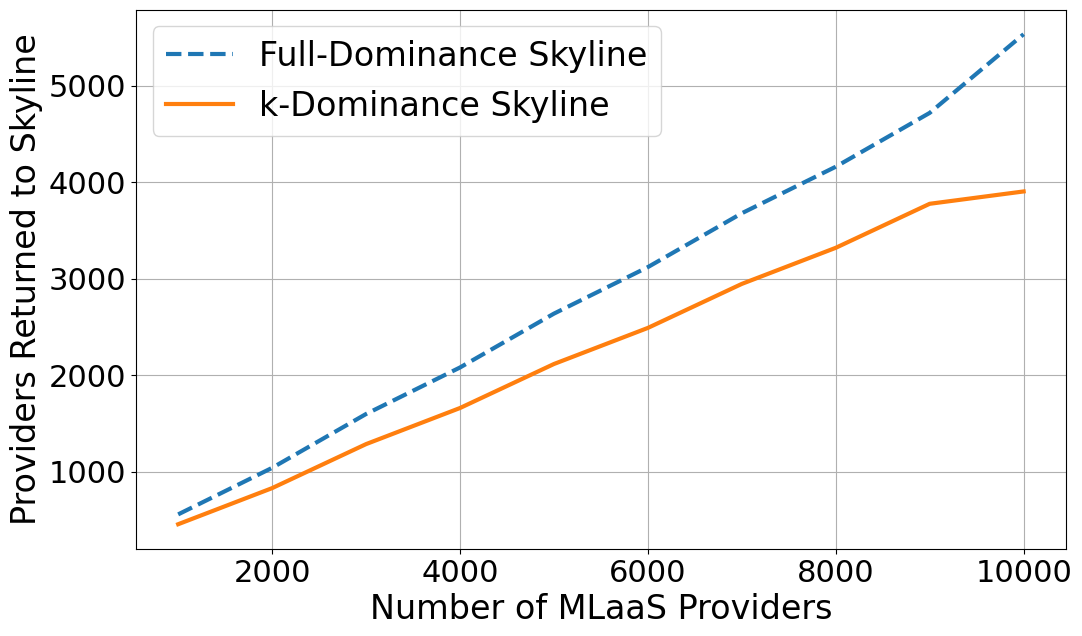

In [ ]:
import matplotlib.pyplot as plt

# ======================================================
# Using Service Request: 1
# Selected Top-k Attributes:
# ['Local_Accuracy(%)', 'Latency(ms)', 'DataVolume(Samples)', 'Reliability_Score', 'Quality_Factor']
# ======================================================
services = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,10000]
full_dom = [558, 1040, 1598, 2080, 2638, 3120, 3678, 4160, 4718, 5533]
k_dom    = [456, 830, 1286, 1660, 2116, 2490, 2946, 3320, 3776, 3904]
# ======================================================
# PLOT
# ======================================================
plt.figure(figsize=(12, 7))
plt.plot(services, full_dom, '--', linewidth=3, label='Full-Dominance Skyline')
plt.plot(services, k_dom, '-', linewidth=3, label='k-Dominance Skyline')

# Labels and title
plt.xlabel('Number of MLaaS Providers', fontsize=24)
plt.ylabel('Providers Returned to Skyline', fontsize=24)
#plt.title('Full-Dominance vs k-Dominance Skyline (Service Request: 1)', fontsize=18)

# Legend and axis formatting
plt.legend(fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd

# Load the dataset
existing_data = pd.read_csv('/content/MLaaS_Advertisement.csv')
existing_data = existing_data[:1000]
Service_request_df = pd.read_csv("Service_request.csv")

# Drop any unnecessary index column
existing_data = existing_data.drop(columns=['Unnamed: 0'], errors='ignore')

# Generate a unique identifier if not present
if 'Service_ID' not in existing_data.columns:
    existing_data['Service_ID'] = existing_data.index  # Use the index as a unique identifier

# Display available attributes
print("Available attributes for skyline computation:")
print(existing_data.columns)

# User selects attributes for the skyline computation
selected_attributes = input(
    "Enter the attributes to consider for skyline computation (comma-separated): "
).strip().split(",")

# Validate user input
selected_attributes = [attr.strip() for attr in selected_attributes]
for attr in selected_attributes:
    if attr not in existing_data.columns:
        raise ValueError(f"Attribute '{attr}' is not in the dataset columns.")

# Function to check full dominance (equal treatment of all attributes)
def is_fully_dominated(p, q, attributes):
    """
    Determines if point p is fully dominated by point q across all attributes.
    """
    for attr in attributes:
        if q[attr] <= p[attr]:  # q is not strictly better in this attribute
            return False
    # If we reach here, q is strictly better in all attributes
    return True

# Function to find the "no dominance" skyline
def no_dominance_skyline(dataset, attributes):
    """
    Finds the "no dominance" skyline: providers not fully dominated by any other provider.
    """
    skyline = []

    for i, p in dataset.iterrows():
        dominated = False
        for j, q in dataset.iterrows():
            if i != j:  # Avoid comparing the point with itself
                if is_fully_dominated(p, q, attributes):  # If p is fully dominated by q
                    dominated = True
                    break
        if not dominated:
            skyline.append(p['Service_ID'])  # Add to skyline if not dominated

    return skyline

# Run the "no dominance" skyline query
no_dominance_skyline_services = no_dominance_skyline(existing_data, selected_attributes)

# Display the results
print("Top No-Dominance Skyline services (first 10 results):", no_dominance_skyline_services[:10])
print("Total count of No-Dominance Skyline services:", len(no_dominance_skyline_services))
#Data_Volume,Dataset_label,Accuracy,Quality_Score,Latency,Computation_Power,Bandwidth

Available attributes for skyline computation:
Index(['MLaaS_ID', 'Model_Name', 'Dataset_Type', 'Data_Volume',
       'Dataset_features', 'Dataset_label', 'Accuracy', 'Quality_Score',
       'Latency', 'Computation_Power', 'Bandwidth', 'Distribution_Type',
       'Probabilities', 'Service_ID'],
      dtype='object')
Enter the attributes to consider for skyline computation (comma-separated): Data_Volume,Dataset_label,Accuracy,Quality_Score,Latency,Computation_Power,Bandwidth
Top No-Dominance Skyline services (first 10 results): [0, 2, 3, 8, 9, 10, 13, 16, 17, 18]
Total count of No-Dominance Skyline services: 439


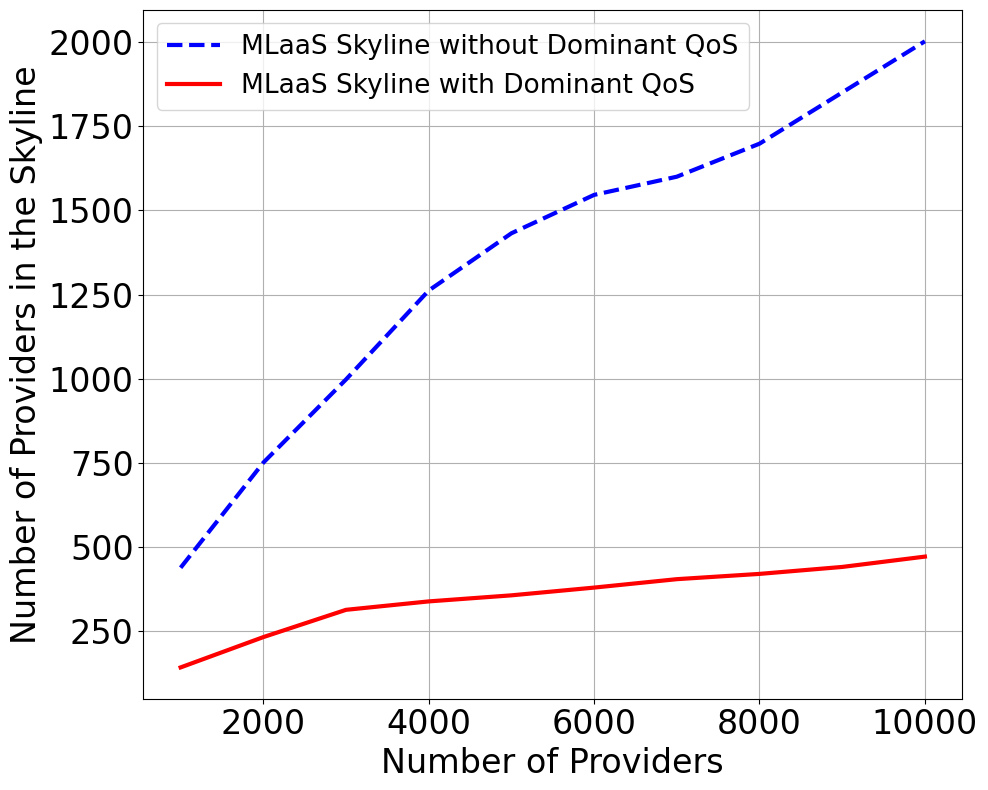

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("mlaas_skyline_data.csv")

providers = df["Providers"]
skyline_without_dominant = df["Skyline_Without_Dominant_QoS"]
skyline_with_dominant = df["Skyline_With_Dominant_QoS"]

# Plot
plt.figure(figsize=(10, 8))
plt.plot(providers, skyline_without_dominant, 'b--', linewidth=3,
         label='MLaaS Skyline without Dominant QoS')
plt.plot(providers, skyline_with_dominant, 'r-', linewidth=3,
         label='MLaaS Skyline with Dominant QoS')

plt.xlabel('Number of Providers', fontsize=24)
plt.ylabel('Number of Providers in the Skyline', fontsize=24)
plt.legend(loc='upper left', fontsize=19)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(True)

plt.tight_layout()
plt.savefig("mlaas_k_dominant_skyline.pdf", format="pdf", bbox_inches="tight")
plt.show()
